<a href="https://www.kaggle.com/code/aakash6263/forbs-500?scriptVersionId=140467928" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-500-billionaires/Billionaires.xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_excel('/kaggle/input/top-500-billionaires/Billionaires.xlsx')

In [4]:
df.to_csv('Forbs_500_bill.csv')

In [5]:
df.shape

(500, 7)

In [6]:
df.head()

,Rank,Name,Net Worth,Change,Age,Source,Country/Territory
0,1,Bernard Arnault & family,$232.2 B,$0M | 0.00%,74.0,LVMH,France
1,2,Elon Musk,$184.7 B,$0M | 0.00%,51.0,"Tesla, SpaceX",United States
2,3,Jeff Bezos,$139.1 B,$0M | 0.00%,59.0,Amazon,United States
3,4,Larry Ellison,$127.8 B,$0M | 0.00%,78.0,Oracle,United States
4,5,Warren Buffett,$116.3 B,$0M | 0.00%,92.0,Berkshire Hathaway,United States


In [7]:
df_orig=df.copy()


In [8]:
df1=df.copy()

**Data Preprocessing**

In [9]:
df.isnull().sum()

Rank                 0
Name                 0
Net Worth            0
Change               0
Age                  7
Source               0
Country/Territory    0
dtype: int64

In [10]:
df[df['Age'].isnull()]


,Rank,Name,Net Worth,Change,Age,Source,Country/Territory
100,101,Karl Albrecht Jr. & family,$16.4 B,$0M | 0.00%,NaN,Supermarkets,Germany
101,102,Beate Heister,$16.4 B,$0M | 0.00%,NaN,Supermarkets,Germany
244,245,Francine von Finck & family,$8.4 B,$0M | 0.00%,NaN,Investments,Germany
424,425,Douglas Leone,$6.2 B,$0M | 0.00%,NaN,Venture capital,United States
448,449,Zhou Qunfei,$5.9 B,$0M | 0.00%,NaN,Smartphone screens,Hong Kong
473,474,Vinod Khosla,$5.6 B,$0M | 0.00%,NaN,Venture capital,United States
487,488,Marcos Galperin,$5.5 B,$0,NaN,E-commerce,Argentina


In [11]:
# fill null value with original values 
fill_na_age=[75,71,55,66,53,68,51]

In [12]:
df[df['Age'].isnull()]=fill_na_age

In [13]:
df.isnull().sum()

Rank                 0
Name                 0
Net Worth            0
Change               0
Age                  0
Source               0
Country/Territory    0
dtype: int64

In [14]:
df.duplicated().sum()

6

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df['Net Worth']=df['Net Worth'].str.replace("$","")
df['Net Worth']=df['Net Worth'].str.replace("B","").astype("float")


/tmp/ipykernel_20/1190810233.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Net Worth']=df['Net Worth'].str.replace("$","")


In [17]:
df.rename(columns={'Net Worth': 'Net Worth in Bilion doller'}, inplace=True)

In [18]:
df.head()

,Rank,Name,Net Worth in Bilion doller,Change,Age,Source,Country/Territory
0,1,Bernard Arnault & family,232.2,$0M | 0.00%,74.0,LVMH,France
1,2,Elon Musk,184.7,$0M | 0.00%,51.0,"Tesla, SpaceX",United States
2,3,Jeff Bezos,139.1,$0M | 0.00%,59.0,Amazon,United States
3,4,Larry Ellison,127.8,$0M | 0.00%,78.0,Oracle,United States
4,5,Warren Buffett,116.3,$0M | 0.00%,92.0,Berkshire Hathaway,United States


In [19]:
df['Change_in_MilDoll']=df['Change'].str.strip().str.split("|").str[0]
df['Change_in_percentage']=df['Change'].str.strip().str.split("|").str[1]

In [20]:
df['Change_in_MilDoll']=df['Change_in_MilDoll'].str.replace('$',"").str.replace('M',"").astype('float')
df['Change_in_percentage']=df['Change_in_percentage'].str.replace('%',"").astype('float')

/tmp/ipykernel_20/2489372061.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Change_in_MilDoll']=df['Change_in_MilDoll'].str.replace('$',"").str.replace('M',"").astype('float')


In [21]:
df.drop('Change', axis=1, inplace=True)

In [22]:
df.head()

,Rank,Name,Net Worth in Bilion doller,Age,Source,Country/Territory,Change_in_MilDoll,Change_in_percentage
0,1,Bernard Arnault & family,232.2,74.0,LVMH,France,0.0,0.0
1,2,Elon Musk,184.7,51.0,"Tesla, SpaceX",United States,0.0,0.0
2,3,Jeff Bezos,139.1,59.0,Amazon,United States,0.0,0.0
3,4,Larry Ellison,127.8,78.0,Oracle,United States,0.0,0.0
4,5,Warren Buffett,116.3,92.0,Berkshire Hathaway,United States,0.0,0.0


In [23]:
df['Change_in_MilDoll'].isnull().sum()

1

In [24]:
df['Change_in_MilDoll'].fillna(df['Change_in_MilDoll'].median(),inplace=True)

In [25]:
df['Change_in_percentage'].isnull().sum()

123

In [26]:
df['Change_in_percentage'].fillna(df['Change_in_percentage'].median(),inplace=True)

In [27]:
df['Change_in_percentage'].isnull().sum()

0

In [28]:
df.isnull().sum()

Rank                          0
Name                          0
Net Worth in Bilion doller    1
Age                           0
Source                        0
Country/Territory             0
Change_in_MilDoll             0
Change_in_percentage          0
dtype: int64

In [29]:
df[df['Net Worth in Bilion doller'].isnull()]

,Rank,Name,Net Worth in Bilion doller,Age,Source,Country/Territory,Change_in_MilDoll,Change_in_percentage
100,75,71,NaN,53.0,68,51,0.0,0.0


In [30]:
df.dropna(inplace=True)

## Exploratory Data Analysis

In [31]:
df.isnull().sum()

Rank                          0
Name                          0
Net Worth in Bilion doller    0
Age                           0
Source                        0
Country/Territory             0
Change_in_MilDoll             0
Change_in_percentage          0
dtype: int64

In [32]:
df.shape

(493, 8)

In [33]:
df.describe()

,Rank,Net Worth in Bilion doller,Age,Change_in_MilDoll,Change_in_percentage
count,493.000000,493.000000,493.000000,493.000000,493.000000
mean,249.423935,15.270791,67.691684,0.411095,-0.001481
std,143.952697,21.644266,13.565344,3.803884,0.041541
min,1.000000,5.400000,31.000000,0.000000,-0.590000
25%,126.000000,6.700000,58.000000,0.000000,0.000000
50%,250.000000,8.300000,68.000000,0.000000,0.000000
75%,373.000000,14.100000,78.000000,0.000000,0.000000
max,500.000000,232.200000,99.000000,51.000000,0.380000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        493 non-null    int64  
 1   Name                        493 non-null    object 
 2   Net Worth in Bilion doller  493 non-null    float64
 3   Age                         493 non-null    float64
 4   Source                      493 non-null    object 
 5   Country/Territory           493 non-null    object 
 6   Change_in_MilDoll           493 non-null    float64
 7   Change_in_percentage        493 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.7+ KB


In [35]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Net Worth in Bilion doller,Age,Change_in_MilDoll,Change_in_percentage
Rank,1.000000,-0.566842,-0.033936,-0.029501,0.002828
Net Worth in Bilion doller,-0.566842,1.000000,0.021538,-0.027068,0.011569
Age,-0.033936,0.021538,1.000000,-0.013484,0.041569
Change_in_MilDoll,-0.029501,-0.027068,-0.013484,1.000000,-0.558827
Change_in_percentage,0.002828,0.011569,0.041569,-0.558827,1.000000


/tmp/ipykernel_20/2944049481.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)


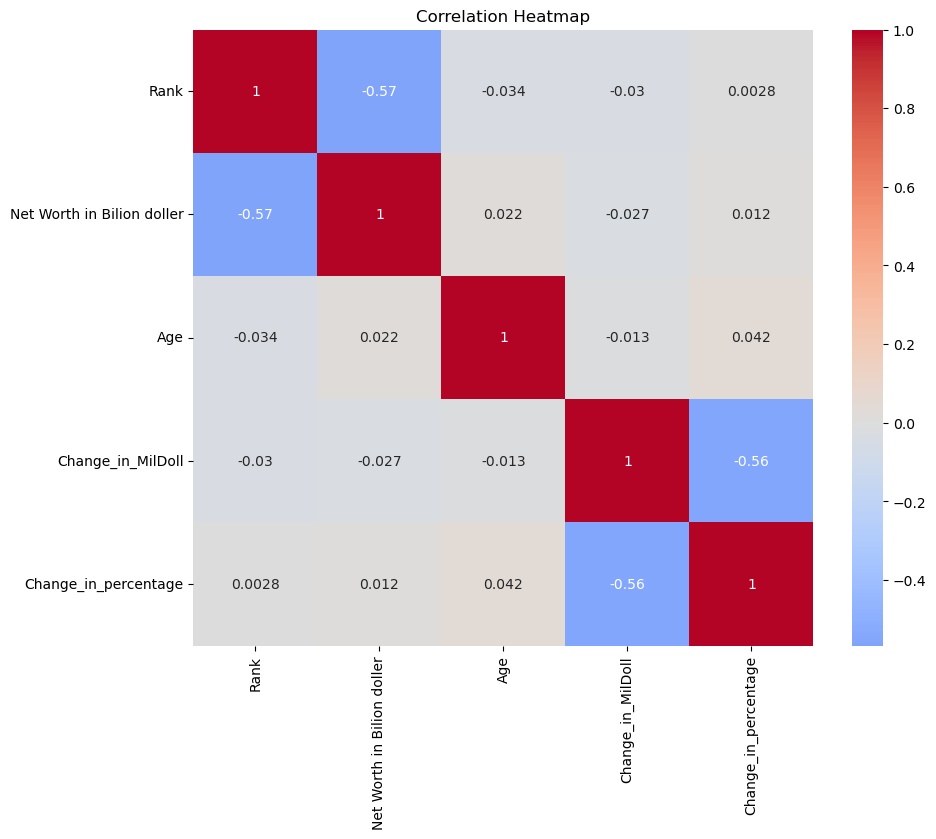

In [36]:
# Set up the figure and axis
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)

# Add plot title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


In [37]:
df.head()

,Rank,Name,Net Worth in Bilion doller,Age,Source,Country/Territory,Change_in_MilDoll,Change_in_percentage
0,1,Bernard Arnault & family,232.2,74.0,LVMH,France,0.0,0.0
1,2,Elon Musk,184.7,51.0,"Tesla, SpaceX",United States,0.0,0.0
2,3,Jeff Bezos,139.1,59.0,Amazon,United States,0.0,0.0
3,4,Larry Ellison,127.8,78.0,Oracle,United States,0.0,0.0
4,5,Warren Buffett,116.3,92.0,Berkshire Hathaway,United States,0.0,0.0


### Question 1: Top  10 countries of highest number of billionaires?                  

In [38]:
df['Country/Territory'].value_counts()

United States           178
China                    58
Russia                   24
India                    23
Germany                  23
France                   18
Hong Kong                16
United Kingdom           12
Switzerland              11
Canada                   10
Sweden                   10
Italy                     8
Australia                 8
Brazil                    7
Israel                    7
Denmark                   6
Singapore                 6
Czech Republic            5
Mexico                    5
Thailand                  5
Taiwan                    5
Indonesia                 5
Ireland                   4
Japan                     4
Austria                   4
Nigeria                   3
Philippines               2
Norway                    2
South Korea               2
Malaysia                  2
Colombia                  2
South Africa              2
Cyprus                    2
Netherlands               2
Spain                     2
Ukraine             

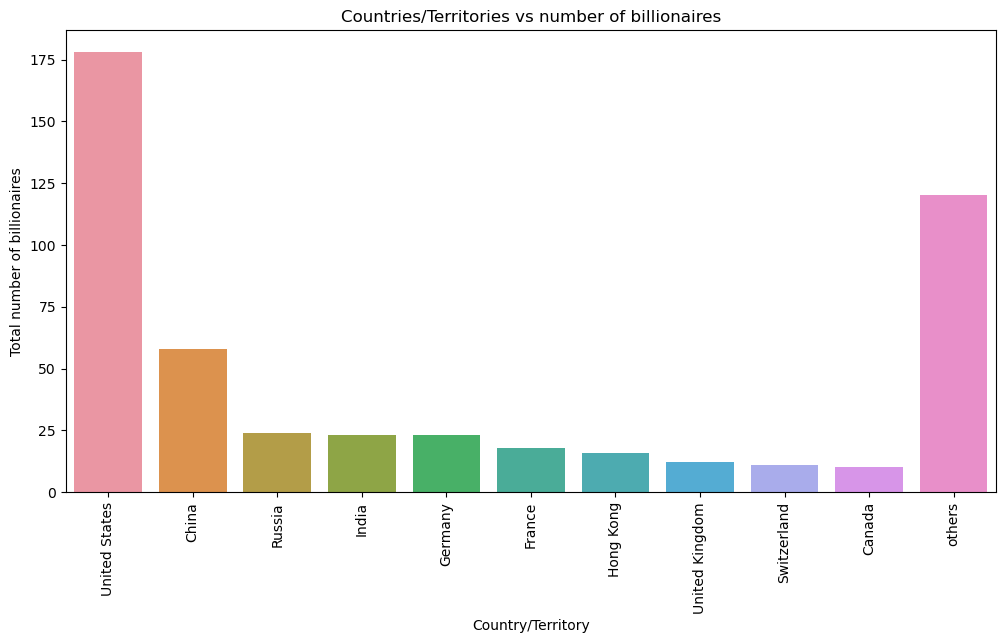

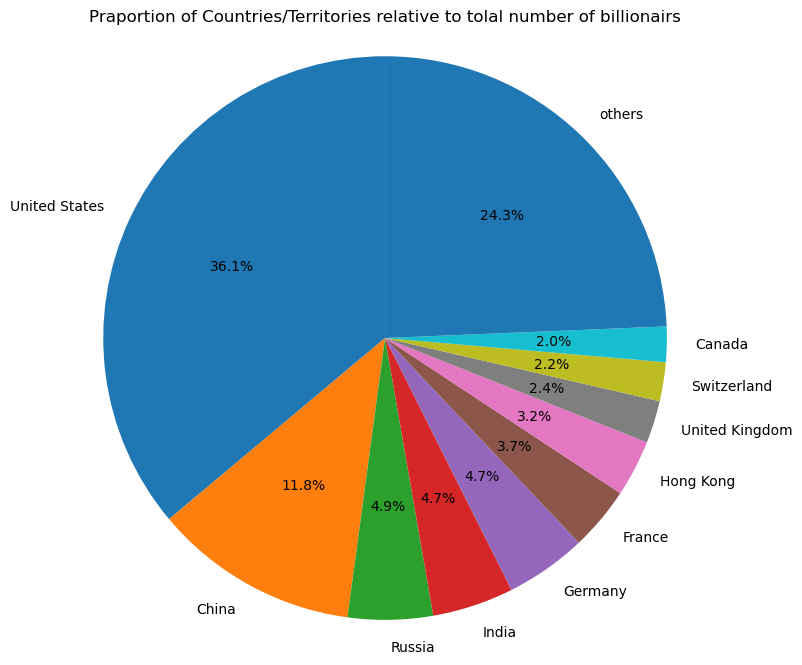

In [39]:
country_counts = df['Country/Territory'].value_counts()
top_n = 10
top_countries = country_counts.head(top_n)
other_countries_count = country_counts.iloc[top_n:].sum()
top_countries['others'] = other_countries_count
# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel('Country/Territory')
plt.ylabel('Total number of billionaires')
plt.title('Countries/Territories vs number of billionaires')
plt.xticks(rotation=90)  
plt.show()

percentages = (top_countries / top_countries.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%.1f%%', startangle=90)
plt.title('Praportion of Countries/Territories relative to tolal number of billionairs'.format(top_n))
plt.axis('equal') 
plt.show()

### Question 2: Total billionaires in top three countries vs others ?

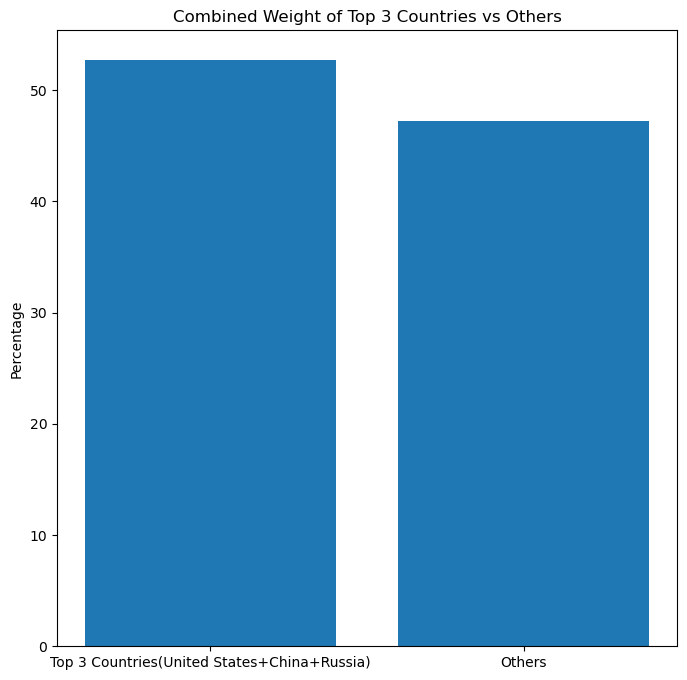

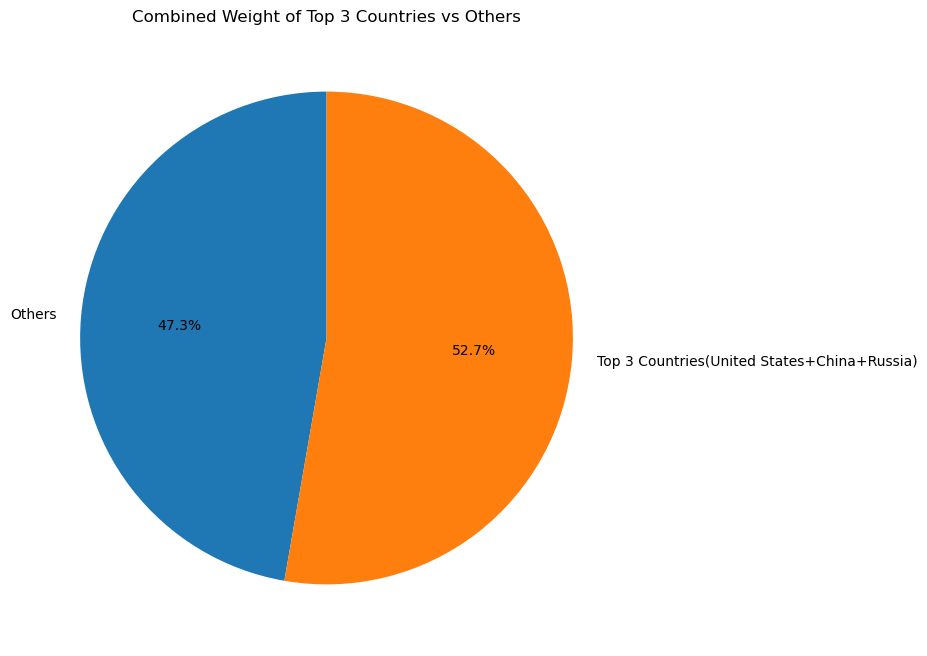

In [40]:
top_n = 3  
# Extract the top three countries
top_countries = country_counts.head(top_n)

# Calculate the count of billionaires in all other countries
other_countries_count = country_counts.iloc[top_n:].sum()

# Calculate the total count of billionaires
total_billionaires = country_counts.sum()

# Calculate the percentage of each category
top_countries_percentage = (top_countries.sum() / total_billionaires) * 100
others_percentage = (other_countries_count / total_billionaires) * 100

# Plot the combined weight of the top three countries vs others
plt.figure(figsize=(8, 8))
plt.bar(['Top 3 Countries(United States+China+Russia)', 'Others'], [top_countries_percentage, others_percentage])
plt.ylabel('Percentage')
plt.title('Combined Weight of Top 3 Countries vs Others')
plt.show()

# Plot the pie chart 
plt.figure(figsize=(8, 8))
plt.pie([others_percentage, 100 - others_percentage], labels=['Others', 'Top 3 Countries(United States+China+Russia)'], autopct='%.1f%%', startangle=90)
plt.title('Combined Weight of Top 3 Countries vs Others')
plt.show()

### Question 3 : How much networth of the world hold by the top 500 billionaiers
Now in order to solve this question I need to know that the total networth of world.For this I refer 
https://www.statista.com/statistics/915334/global-wealth-value/#:~:text=Value%20of%20wealth%20globally%202012%2D2023&text=This%20figure%20was%20projected%20to,trillion%20U.S.%20dollars%20in%202023 on Statista.com.
As mantioned in the above site the total networth of the world is 272.0 trillion U.S. dollars in 2023

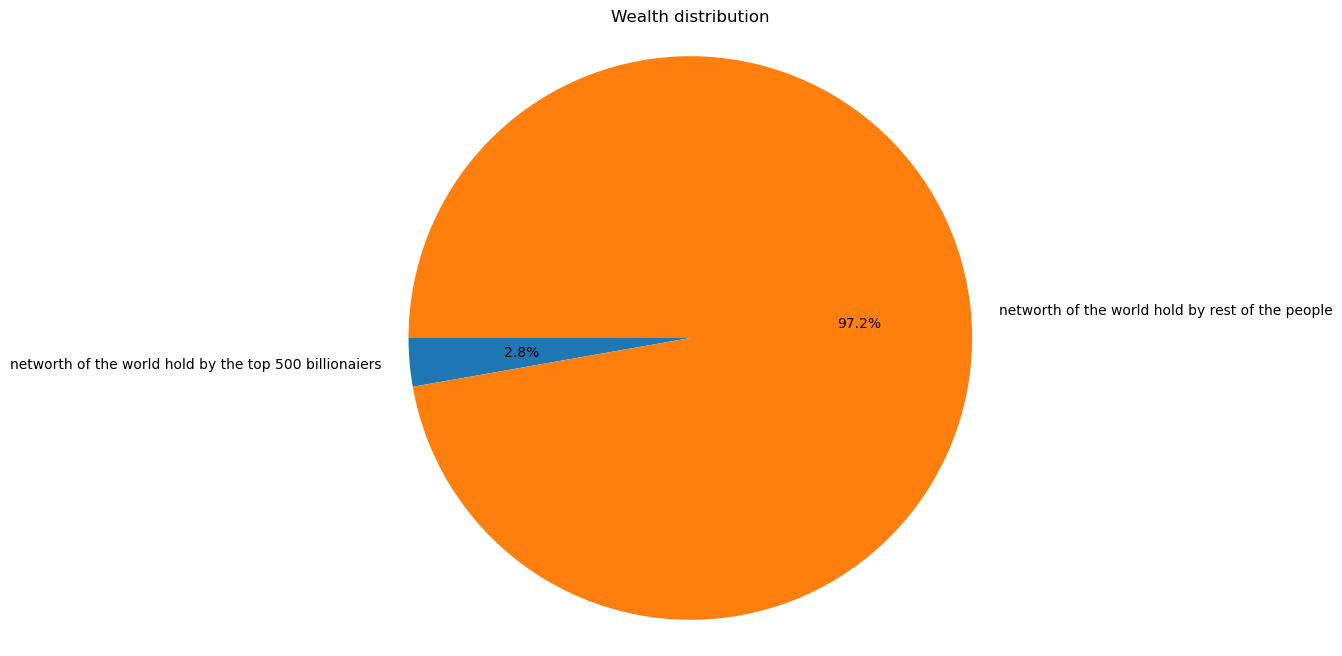

In [41]:
total_networth_top500_billionaires_inTrilionDollar=df["Net Worth in Bilion doller"].sum()/1000
total_world_networth_inTrilionDollar=272
proportion_world_total_wealth_held_by_top500_billionaires=(total_networth_top500_billionaires_inTrilionDollar/total_world_networth_inTrilionDollar)*100

other_percentage=proportion_world_total_wealth_held_by_top500_billionaires
plt.figure(figsize=(8, 8))
plt.pie([other_percentage, 100 - other_percentage], labels=['networth of the world hold by the top 500 billionaiers', 'networth of the world hold by rest of the people'], autopct='%.1f%%', startangle=180)
plt.title('Wealth distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

***As you can see, the top 500 billionaires hold a significant amount of wealth. They have more wealth than the rest of the people in the world combined.
This inequality is a major concern, as it means that a small number of people have an outsized amount of power and influence. It also means that there is a lot of poverty and inequality in the world.***

### Question 4 : The wealth comparision of the top ten billionaires in comparison to the bottom 490 billionaires

In [42]:
df.head(10)

,Rank,Name,Net Worth in Bilion doller,Age,Source,Country/Territory,Change_in_MilDoll,Change_in_percentage
0,1,Bernard Arnault & family,232.2,74.0,LVMH,France,0.0,0.0
1,2,Elon Musk,184.7,51.0,"Tesla, SpaceX",United States,0.0,0.0
2,3,Jeff Bezos,139.1,59.0,Amazon,United States,0.0,0.0
3,4,Larry Ellison,127.8,78.0,Oracle,United States,0.0,0.0
4,5,Warren Buffett,116.3,92.0,Berkshire Hathaway,United States,0.0,0.0
5,6,Bill Gates,114.3,67.0,Microsoft,United States,0.0,0.0
6,7,Larry Page,104.2,50.0,Google,United States,0.0,0.0
7,8,Sergey Brin,99.1,49.0,Google,United States,0.0,0.0
8,9,Steve Ballmer,98.4,67.0,Microsoft,United States,0.0,0.0
9,10,Carlos Slim Helu & family,97.3,83.0,Telecom,Mexico,0.0,0.0


In [43]:
NetWorth_top10_bill=df['Net Worth in Bilion doller'][:10].sum()
NetWorth_bottom490_bill=df['Net Worth in Bilion doller'][10:].sum()


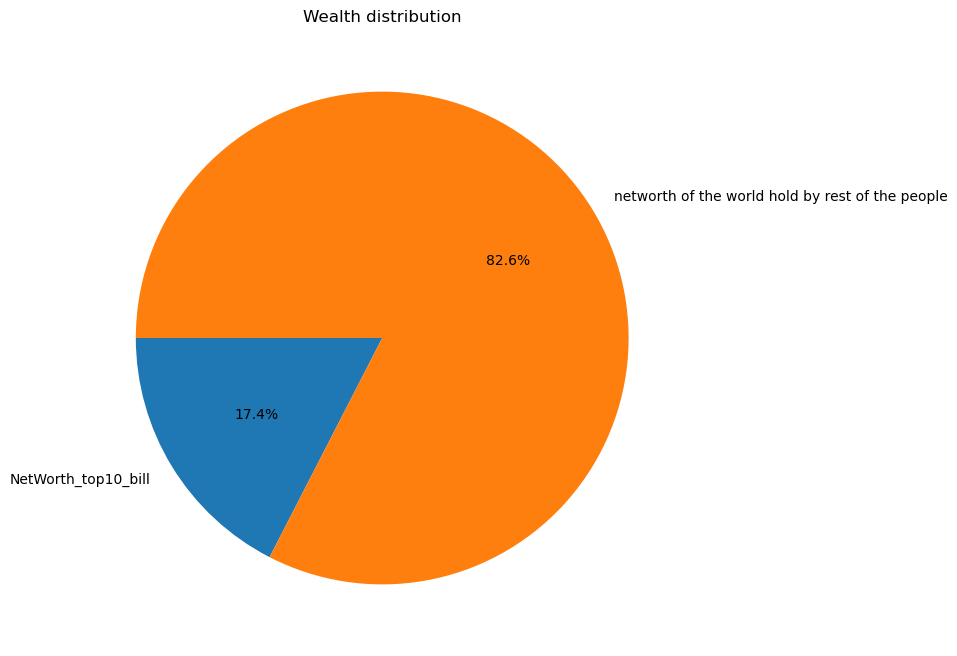

In [44]:
plt.figure(figsize=(8, 8))
plt.pie([NetWorth_top10_bill, NetWorth_bottom490_bill], labels=['NetWorth_top10_bill', 'networth of the world hold by rest of the people'], autopct='%.1f%%', startangle=180)
plt.title('Wealth distribution')

plt.show()

### Question 5: Plot the age distribution of the billionairesbillionaires

In [45]:
df['Age'].max()

99.0

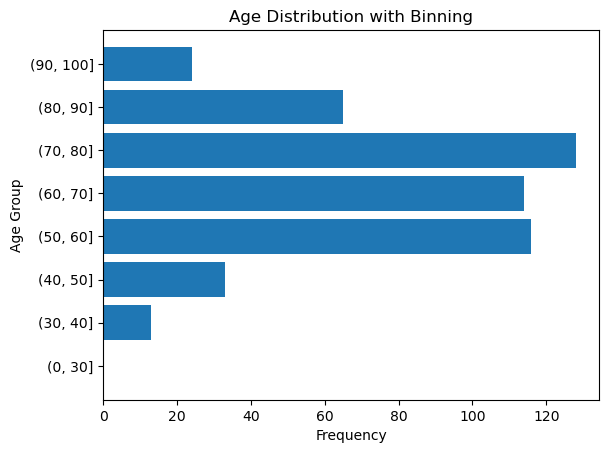

In [46]:
# Sample age data (assuming 'Age' column from the DataFrame)
age_data = df['Age']

# Define the custom bin edges (unequally spaced intervals)
bin_edges = [0, 30, 40, 50, 60, 70, 80, 90, 100]

# create the bins
age_bins = pd.cut(age_data, bins=bin_edges)

# Count the occurrences of each bin
bin_counts = pd.value_counts(age_bins)

# Sort the bin_counts Series by age group
bin_counts = bin_counts.sort_index()

# Create a horizontal bar plot to visualize the binning
plt.barh(bin_counts.index.astype(str), bin_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Age Group')
plt.title('Age Distribution with Binning')
plt.show()


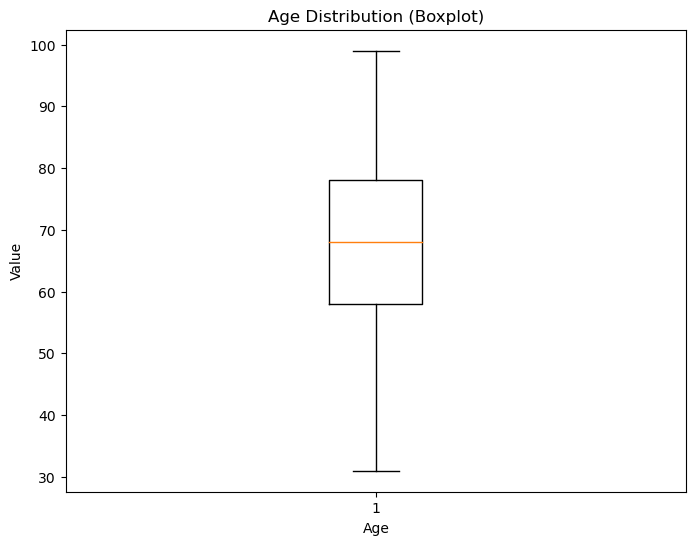

In [47]:
age_data = df['Age']

# Create a boxplot to visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.boxplot(age_data)
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Age Distribution (Boxplot)')
plt.show()

**0The majority of the billionaires belong to the age group 55–80.**